In [31]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
titanic_df = pd.read_csv('train.csv')

In [33]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [34]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


Look at the gender of the passengers

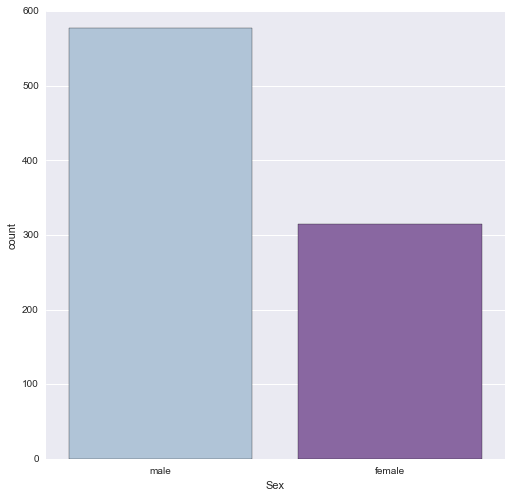

In [35]:

gender = sns.factorplot('Sex',kind='count',data=titanic_df,palette='BuPu',
                       size=7)

To view the further breakdown of gender by classes:

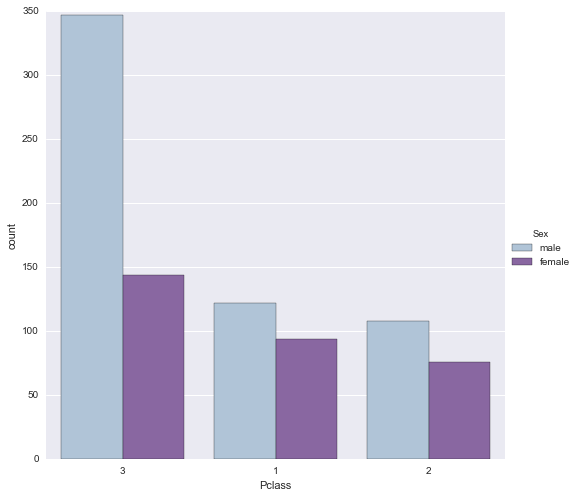

In [36]:
gender_class = sns.factorplot(x="Pclass",kind='count',data=titanic_df,
                              hue='Sex',palette='BuPu',size=7)

It is evident tha the numbers of males in third class are way more that the number of females in that same class. The gap between the numbers of males and females is lesser in the first and second class however.

To further observe the split between men, women and children, we can hold that anyone below the age of 18 as per the UN definition

Create an additional column to state whether person is male, female or child based on age

In [37]:
def is_child (person):
    Age, Sex = person
    if Age < 18:
        return 'child'
    else:
        return Sex
    
titanic_df['m/f/c'] = titanic_df[['Age','Sex']].apply(is_child,axis=1)  
titanic_df[:11]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,m/f/c
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


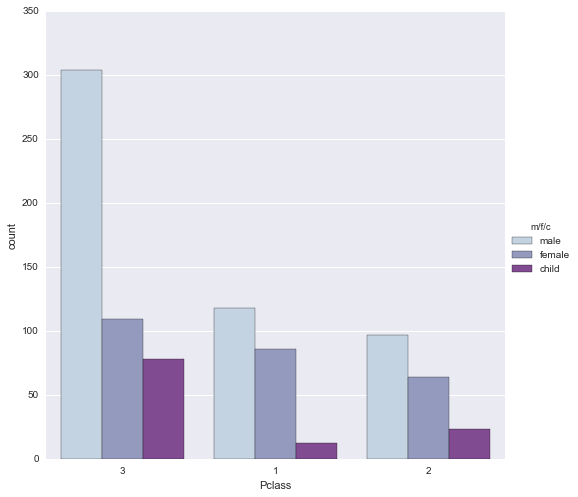

In [38]:
child = sns.factorplot(x='Pclass',kind = 'count',data = titanic_df,
                       hue='m/f/c',palette='BuPu',size = 7)

We can also look at the distribution of ages:

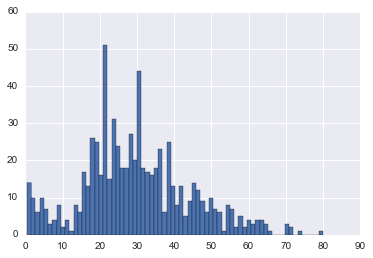

In [39]:
titanic_df['Age'].hist(bins=70)

Next we can examine the relationship between the deck and the class that they were on

In [40]:
deck = titanic_df['Cabin'].dropna()

In [41]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

We can work with only the first letters for each Cabin

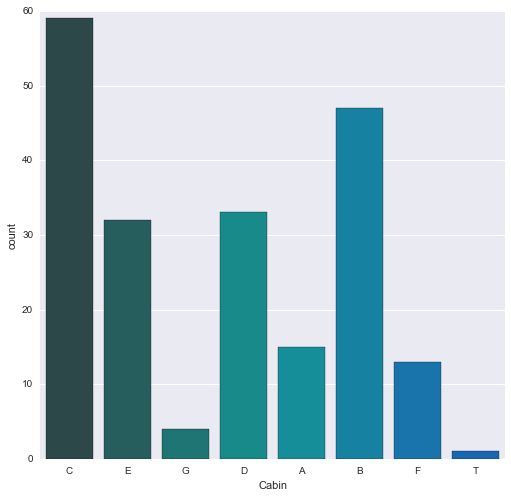

In [42]:
levels= []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot(x='Cabin', kind ='count',data = cabin_df, palette = 'winter_d',
               size = 7)

As there seems to have been an additional column created called "T", we can go ahead and get rid of that:



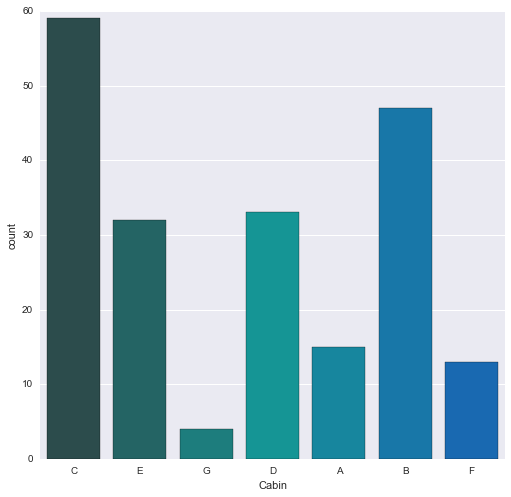

In [43]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot(x='Cabin', kind ='count',data = cabin_df, palette = 'winter_d',
               size = 7)

To see where the passengers came from:


In [44]:
titanic_countdf.head()

NameError: name 'titanic_countdf' is not defined

In [ ]:
sns.factorplot(x='Embarked', kind = 'count', data = titanic_df,size = 7, hue = 'Pclass')

Who was alone and who was with family

In [ ]:
titanic_df.head()

In [ ]:
titanic_df["Alone"] = titanic_df.SibSp + titanic_df.Parch

In [ ]:
titanic_df['Alone'].head()

In [ ]:
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] ==0] = 'Alone'

In [ ]:
titanic_df.head()

In [ ]:
sns.factorplot(x = 'Alone',kind = 'count', data = titanic_df, palette ='Blues')

In [ ]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:"no",1:"yes"})
sns.factorplot(x = 'Survivor', kind = 'count', data = titanic_df, palette = "Blues")

View of how survival rate was determined by class and gender:

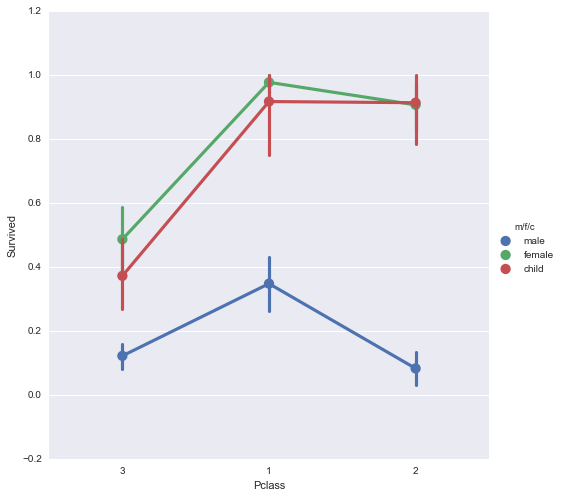

In [47]:
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'm/f/c',data = titanic_df, size = 7)

Would age be a factor that determined survival?

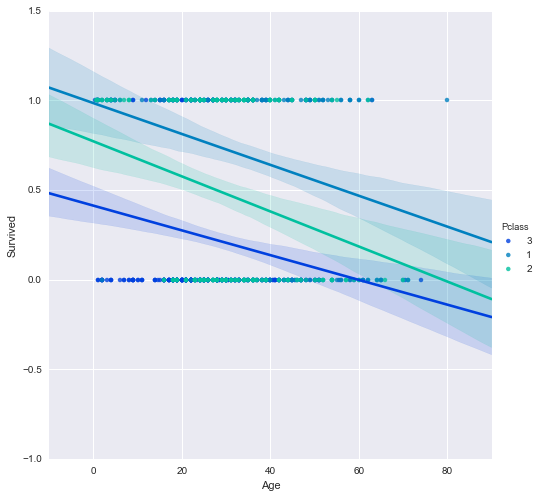

In [53]:
sns.lmplot('Age', 'Survived', data = titanic_df, size = 7, hue  = 'Pclass', palette = 'winter')

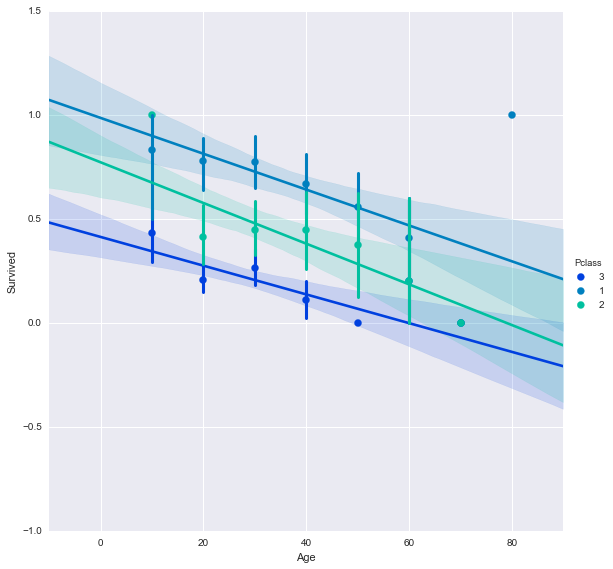

In [59]:
generations = [10, 20, 30, 40, 50 , 60, 70, 80]
sns.lmplot('Age', 'Survived', hue = 'Pclass', palette ='winter', x_bins = generations, data = titanic_df, size  = 8)